<a href="https://colab.research.google.com/github/setthawut8/AI/blob/main/Feedback180_Sentiment_Analysis_%5BAll_Types%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WordNet

In [ ]:
#https://stackoverflow.com/questions/43913983/using-wordnet-synsets-from-python-for-italian-language
#http://compling.hss.ntu.edu.sg/omw/

!pip install --user -U nltk
!pip install --user -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
#Used in Italy
cane_lemmas = wn.lemmas("cane", lang="ita")
print(cane_lemmas)

hypernyms = cane_lemmas[0].synset().hypernyms()
print(hypernyms)
print(hypernyms[1].lemmas(lang="ita"))

[Lemma('dog.n.01.cane'), Lemma('cramp.n.02.cane'), Lemma('hammer.n.01.cane'), Lemma('bad_person.n.01.cane'), Lemma('incompetent.n.01.cane')]
[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Lemma('domestic_animal.n.01.animale_addomesticato'), Lemma('domestic_animal.n.01.animale_domestico')]


In [ ]:
#Used for the Thai language
print(wn.synset('dog.n.01').lemma_names('tha'))
print(wn.lemmas('dog'))
#See language list
#wn.langs()

['สุนัข', 'หมา', 'หมาบ้าน']
[Lemma('dog.n.01.dog'), Lemma('frump.n.01.dog'), Lemma('dog.n.03.dog'), Lemma('cad.n.01.dog'), Lemma('frank.n.02.dog'), Lemma('pawl.n.01.dog'), Lemma('andiron.n.01.dog'), Lemma('chase.v.01.dog')]


# TH-EN Sentiment Scoring

## Translational Sentiment Scoring
#####[Code] All Sentiment Libray as below: https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Sentiment_Analysis.ipynb#scrollTo=MkRF-2LzCMxI
#####[Medium] All Sentiment Libray as below: 
https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c

In [ ]:
#Translation:
### PyThaiNLP: https://pythainlp.github.io/docs/2.3/api/translate.html
### Transformer: https://airesearch.in.th/releases/machine-translation-models/

#Sentiment Scoring:
### Rule-based
###### Textblob: https://textblob.readthedocs.io/en/dev/
###### Vader: https://medium.com/@kolungade.s/sentiment-analysis-68bcae846e36
### SpaCy, Gensim

###Library

In [ ]:
!pip install flair
!pip install fairseq
!pip install pythainlp
!pip install transformers
!pip install vaderSentiment
!pip install sacremoses sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 18.4 MB/s 
     |████████████████████████████████| 4.4 MB 57.3 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 19.7 MB 7.3 MB/s 
     |████████████████████████████████| 1.6 MB 37.9 MB/s 
     |████████████████████████████████| 1.2 MB 7.6 MB/s 
     |████████████████████████████████| 981 kB 44.5 MB/s 
     |████████████████████████████████| 788 kB 43.8 MB/s 
     |████████████████████████████████| 46 kB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 199 kB 19.1 MB/s 
     |████████████████████████████████| 62 kB 649 kB/s 
     |████████████████████████████████| 596 kB 41.5 MB/s 
     |████████████████████████████████| 6.6 MB 7.1 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=cbe9a2e7c2fc9a43a

In [ ]:
import flair
import pandas as pd
import seaborn as sns

from textblob import TextBlob
from pythainlp.translate import Translate
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Coding

In [ ]:
vader = SentimentIntensityAnalyzer()
en2th = Translate('en','th')
th2en = Translate('th', 'en')

2022-06-20 08:04:58 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


Corpus: scb_1m_en-th_moses
- Downloading: scb_1m_en-th_moses 1.0


100%|██████████| 1174648148/1174648148 [00:10<00:00, 116822216.63it/s]
2022-06-20 08:05:30 | INFO | fairseq.file_utils | loading archive file /root/pythainlp-data/scb_1m_en-th_moses/SCB_1M-MT_OPUS+TBASE_en-th_moses-spm_130000-16000_v1.0/models
2022-06-20 08:05:30 | INFO | fairseq.file_utils | loading archive file /root/pythainlp-data/scb_1m_en-th_moses/SCB_1M-MT_OPUS+TBASE_en-th_moses-spm_130000-16000_v1.0/vocab
2022-06-20 08:05:35 | INFO | fairseq.tasks.translation | [en] dictionary: 130000 types
2022-06-20 08:05:35 | INFO | fairseq.tasks.translation | [th] dictionary: 15984 types
2022-06-20 08:05:37 | INFO | fairseq.models.fairseq_model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': './checkpoints/1m-scb+mt-opus_27.5.2020/en-th/moses-spm/130000-16000/log', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False,

Corpus: scb_1m_th-en_spm
- Downloading: scb_1m_th-en_spm 1.0


100%|██████████| 703780432/703780432 [00:05<00:00, 136581085.06it/s]
2022-06-20 08:05:54 | INFO | fairseq.file_utils | loading archive file /root/pythainlp-data/scb_1m_th-en_spm/SCB_1M-MT_OPUS+TBASE_th-en_spm-spm_32000-joined_v1.0/models
2022-06-20 08:05:54 | INFO | fairseq.file_utils | loading archive file /root/pythainlp-data/scb_1m_th-en_spm/SCB_1M-MT_OPUS+TBASE_th-en_spm-spm_32000-joined_v1.0/vocab
2022-06-20 08:05:58 | INFO | fairseq.tasks.translation | [th] dictionary: 29720 types
2022-06-20 08:05:59 | INFO | fairseq.tasks.translation | [en] dictionary: 29720 types
2022-06-20 08:06:00 | INFO | fairseq.models.fairseq_model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': './checkpoints/1m-scb+mt-opus_27.5.2020/th-en/spm-spm/32000-joined/log', 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': Fals

In [ ]:
txt = 'ช่วงนี้จะท้าทายหน่อย แต่อนาคตต้องดีขึ้นอย่างแน่นอน'

txt_translated = th2en.translate(txt)
print(txt_translated)
vader_stm_scores = vader.polarity_scores(txt_translated)
textBlob_stm_scores = TextBlob(txt_translated).sentiment
print("Vader: ", vader_stm_scores)
print("TextBlob: ", textBlob_stm_scores)

It's a challenging time, but the future will definitely get better.
Vader:  {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8271}
TextBlob:  Sentiment(polarity=0.25, subjectivity=0.53125)


In [ ]:
#https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Sentiment_Analysis.ipynb#scrollTo=3E3QOWoqaJAn
sentence = txt_translated
print(sentence)
sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

It's a challenging time, but the future will definitely get better.


Vader :  {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8271}


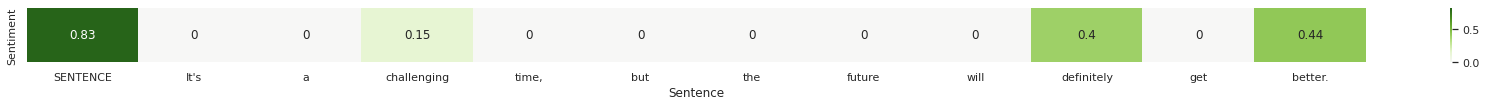

In [ ]:
#Vader
print("Vader : ", vader_stm_scores)
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[vader.polarity_scores(sentence)["compound"]] + [vader.polarity_scores(word)["compound"] for word in sentence.split()]
})

TextBlob : Sentiment(polarity=0.25, subjectivity=0.53125)


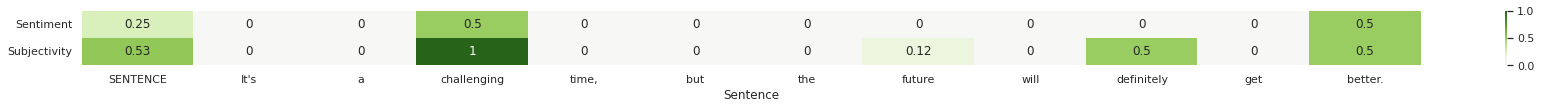

In [ ]:
#TextBlob
print("TextBlob :", textBlob_stm_scores)
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

2022-06-20 06:51:48,066 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmphbatoeoz


100%|██████████| 265512723/265512723 [00:18<00:00, 14293705.67B/s]

2022-06-20 06:52:07,141 copying /tmp/tmphbatoeoz to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-06-20 06:52:08,033 removing temp file /tmp/tmphbatoeoz
2022-06-20 06:52:08,072 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

['Sentence: "It 's a challenging time , but the future will definitely get better ."'/'POSITIVE' (0.991)]


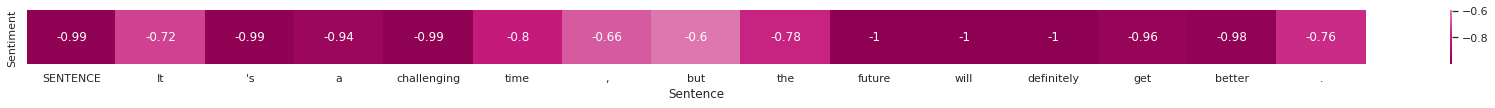

In [ ]:
#Flair
print("Flair :")
#Fair: https://towardsdatascience.com/text-classification-with-state-of-the-art-nlp-library-flair-b541d7add21f
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
print(total_sentiment)

tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

In [ ]:
s3 = flair.data.Sentence(sentence)
print(s3)

Sentence: "It 's a challenging time , but the future will definitely get better ."


In [ ]:
flair_sentiment.predict(s3)

In [ ]:
total_sentiment = s3.labels
total_sentiment

['Sentence: "It 's a challenging time , but the future will definitely get better ."'/'POSITIVE' (0.991)]

In [ ]:
tokens = [token.text for token in s3.tokens]
print(tokens)
ss = [flair.data.Sentence(s) for s in tokens]
print(ss)

['It', "'s", 'a', 'challenging', 'time', ',', 'but', 'the', 'future', 'will', 'definitely', 'get', 'better', '.']
[Sentence: "It", Sentence: "' s", Sentence: "a", Sentence: "challenging", Sentence: "time", Sentence: ",", Sentence: "but", Sentence: "the", Sentence: "future", Sentence: "will", Sentence: "definitely", Sentence: "get", Sentence: "better", Sentence: "."]


In [ ]:
!git init

# // Create a file to add
!git touch README.md

# // Add this file to the stage
!git add README.md

# // Do your first commit.
!git commit "Initial commit"

# // Create a new branch and check it out
!git checkout -b new-branch

Initialized empty Git repository in /content/.git/
git: 'touch' is not a git command. See 'git --help'.
fatal: pathspec 'README.md' did not match any files
error: pathspec 'Initial commit' did not match any file(s) known to git.
Switched to a new branch 'new-branch'


In [ ]:
!git --help

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [ ]:
!git remote add origin https://setthawut8:Drogboom@GH#1@github.com/setthawut8/reponame.git

In [ ]:
ls

sample_data/


In [ ]:
git push

SyntaxError: ignored

In [ ]:
!git add .

In [ ]:
!git status

On branch new-branch

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   .config/.last_opt_in_prompt.yaml
	new file:   .config/.last_survey_prompt.yaml
	new file:   .config/.last_update_check.json
	new file:   .config/active_config
	new file:   .config/config_sentinel
	new file:   .config/configurations/config_default
	new file:   .config/gce
	new file:   .config/logs/2022.06.15/13.40.48.132932.log
	new file:   .config/logs/2022.06.15/13.41.09.043730.log
	new file:   .config/logs/2022.06.15/13.41.26.949194.log
	new file:   .config/logs/2022.06.15/13.41.34.237699.log
	new file:   .config/logs/2022.06.15/13.41.53.140518.log
	new file:   .config/logs/2022.06.15/13.41.53.804987.log
	new file:   sample_data/README.md
	new file:   sample_data/anscombe.json
	new file:   sample_data/california_housing_test.csv
	new file:   sample_data/california_housing_train.csv
	new file:   sample_data/mnist_test.csv
	new file:   sample_data/mnist_train_smal

In [ ]:
!git push orgin "First Commit"

fatal: remote part of refspec is not a valid name in First Commit
